In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
farmer_data = pd.read_excel('Farmer Profile.xlsx')

C:\Users\EMMANUELLA\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.


In [3]:
farmer_data.to_csv('Farmer Profile.csv')

In [4]:
farmer_data.head()

,Unnamed: 0,_id,device_response_id,completion_rate,contact_id,contact_language_id,device_id,duration,end_location,end_timestamp,...,user_contact_id,user_id,validated_by,validated_on,Do you have a Mobile Money account?,q24477o,q24477oc,Do you herewith confirm that the information given in this report is correct and complete,q24478o,q24478oc
0,9858.0,60d990f8a74a6f4549af0f37,a7e12664d4c44ab8-1603877929402,81.08,NaN,NaN,1158.0,02:05:50,"{'type': 'Point', 'coordinates': [0.0, 0.0]}",2020-10-28 11:44:39,...,0.0,746.0,Mary Serwaa Numafo,2020-11-04 11:31:12,NaN,NaN,NaN,NaN,NaN,NaN
1,23756.0,60d993dfa74a6f4549af7c42,85f81e782b65cbc6-1602237039201,89.19,NaN,NaN,1135.0,00:07:15,"{'type': 'Point', 'coordinates': [0.0, 0.0]}",2020-10-09 09:57:54,...,0.0,481.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,19974.0,60d992dca74a6f4549af5e4f,1602690782.4212-421-11,13.51,NaN,NaN,1.0,00:00:00,"{'type': 'Point', 'coordinates': [-1.38882, 5....",2020-10-14 15:53:02,...,0.0,346.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,39495.0,60e30a85a74a6f4549b19c42,c50eb0582bd7181e-1599470200528,86.49,NaN,NaN,705.0,00:05:50,"{'type': 'Point', 'coordinates': [0.0, 0.0]}",2020-09-07 09:22:30,...,0.0,466.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,44825.0,60e30bb3a74a6f4549b1c5ed,50027e9898a0f83a-1597685872897,21.62,63078.0,121.0,817.0,00:00:00,"{'type': 'Point', 'coordinates': [0.0, 0.0]}",2020-08-17 17:37:52,...,0.0,520.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
farmer_data.isnull().sum().head()

Unnamed: 0               0
_id                      0
device_response_id       0
completion_rate          0
contact_id            1442
dtype: int64

<AxesSubplot:>

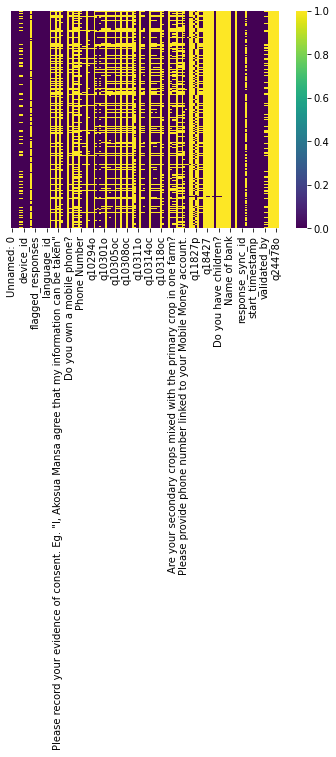

In [6]:
sns.heatmap(farmer_data.isnull(), yticklabels = False ,cbar = True , cmap = 'viridis')

In [7]:
#Cleaning data
# Columns like sales_point_name had 75% of it cells null
farmer_data.drop(['sale_point_name','sale_point_id','device_response_id','q24478oc','q24477oc','end_location','end_timestamp','duration','flags','farmer_verification','publish_date','Location','Please record your evidence of consent. Eg. "I, Akosua Mansa agree that my information can be taken"','flag_summary','internal_response_id','flagged_responses','Do you herewith confirm that the information given in this report is correct and complete'], axis = 1, inplace = True)

In [8]:
#Cleaning more data
farmer_data.drop(['q10288oc','q10289oc','q10290oc','Phone Number','q10292oc','Farmer Image','q10306oc','q10308oc','q10319o','q10310oc','q10294oc','q10305oc','q10311oc','q10394p','q11827pid','q18427','q18427o','q18427oc','q24478o','q24477o','Do you have a Mobile Money account?','validated_on','Name of bank','user_contact_id','updated_at','survey_id','submitted_on','start_timestamp','start_location','score','q22148t','remarks','q18430oc','q18430o','q18428','Do you have a bank account?','q18429oc','q18429o','Do you have children?','q18428pid','q10301oc','q18428p','q10284oc','q10319oc','Provide the phone number of a relative if you do not own a phone.','q12024oc','Please provide phone number linked to your Mobile Money account.','q10322oc','q10321oc','q10319o','q10318oc','q10314oc','Date of birth','National ID image (ID card image  or Upload Image)'] ,axis = 1, inplace = True)

In [9]:
#drop first column
farmer_data.drop( columns = farmer_data.columns[0] , axis =1 ,inplace = True)

In [10]:
sns.set_style('whitegrid')

In [11]:
# filling numerical null values with mean values of columns
mean_age = farmer_data['Age'].mean()
farmer_data['Age'].fillna(value = mean_age , inplace = True)


In [12]:
mean_annual_primary_crop = farmer_data['What is your annual primary crop  yield estimate (bags)?'].mean().round()
farmer_data['What is your annual primary crop  yield estimate (bags)?'].fillna(value = mean_annual_primary_crop, inplace = True)

In [13]:
mean_farm_size_primary_crop = farmer_data['What is the farm size of your primary crop in acres?'].mean().round()
farmer_data['What is the farm size of your primary crop in acres?'].fillna(value = mean_farm_size_primary_crop , inplace = True)

In [14]:
mean_total_farmsize =farmer_data['What is your total farm size? (in acres)'].mean().round()
farmer_data['What is your total farm size? (in acres)'].fillna(value = mean_total_farmsize , inplace = True)

In [15]:
mean_years_of_farming_experience = farmer_data['Years of farming experience?'].mean().round()
farmer_data['Years of farming experience?'].fillna(value = mean_years_of_farming_experience  , inplace =  True)

In [16]:
mean_number_of_children = farmer_data['Indicate Number of children'].mean().round()
farmer_data['Indicate Number of children'].fillna(value = mean_number_of_children , inplace = True)

In [17]:
mean_household_size = farmer_data['Household size'].mean().round()
farmer_data['Household size'].fillna(value = mean_household_size , inplace = True)

In [18]:
farmer_data['Household size'].isnull().sum()

0

In [19]:
# Fill null categorical variables with mode (highest) values of respective columns
farmer_data.fillna(farmer_data.mode().iloc[0], inplace = True)

In [20]:
# Group  categorical variables by respective codes

farmer_data['consent'] = farmer_data.groupby(['I consent to my personal data being recorded and processed for purposes to aid farmer insight and decision making','q10284o']).ngroup()

farmer_data['Gender1'] = farmer_data.groupby(['Gender','q10288o']).ngroup()

farmer_data['Mobile phone'] = farmer_data.groupby(['Do you own a mobile phone?','q10289o']).ngroup()

farmer_data['Feature phone'] = farmer_data.groupby(['Is it a feature phone (yam phone) or a smartphone?','q10290o']).ngroup()

farmer_data["Farmer's Language1"] = farmer_data.groupby(["Farmer's Language",'q10292o']).ngroup()

farmer_data['Primary crop grown (Highest income-generating crop1)'] = farmer_data.groupby(['Primary crop grown (Highest income-generating crop)','q10294o']).ngroup()

farmer_data['Marital Status1'] = farmer_data.groupby(['Marital Status','q10301o']).ngroup()

farmer_data['Educational level'] = farmer_data.groupby(['What is your highest level of education','q10305o']).ngroup()

farmer_data['Main source of income'] = farmer_data.groupby(['What is your main source of income?','q10306o']).ngroup()

farmer_data['Secondary source of income'] = farmer_data.groupby(['Secondary source of income?','q10308o']).ngroup()

farmer_data['Livestock'] = farmer_data.groupby(['Do you keep livestock?','q10310o']).ngroup()

farmer_data[' Which Livestock '] = farmer_data.groupby(['Which animal do your rear?','q10311o']).ngroup()

farmer_data[' Farm ownership '] = farmer_data.groupby(['Farm ownership status?','q10314o']).ngroup()

farmer_data[' Secondary crop? '] = farmer_data.groupby(['Do you grow a secondary crop?','q10318o']).ngroup()

farmer_data[' Secondary crop(s) grown1 '] = farmer_data.groupby(['Secondary crop(s) grown','q10319cs']).ngroup()

farmer_data[' Secondary crops mixed with the primary crop in one farm'] = farmer_data.groupby(['Are your secondary crops mixed with the primary crop in one farm?','q10321o']).ngroup()

farmer_data['Mobile network  primarily registered for Mobile Money '] = farmer_data.groupby(['Which mobile network have you primarily registered for Mobile Money?','q10322o']).ngroup()

farmer_data[' Belong to Farmer group'] = farmer_data.groupby(['Do you belong to a farmer group?','q12024o']).ngroup()

farmer_data['Name of Farmer group'] = farmer_data.groupby(['Name of Farmer Group/ Association/ Agribusiness','q11827p']).ngroup()





In [21]:
farmer_data['Marital Status'].head()

0    Single/Never married
1                 Widowed
2                 Married
3                 Married
4                 Married
Name: Marital Status, dtype: object

In [22]:
farmer_data.isnull().sum().head(40)

_id                                                                                                                  0
completion_rate                                                                                                      0
contact_id                                                                                                           0
contact_language_id                                                                                                  0
device_id                                                                                                            0
is_complete                                                                                                          0
is_flagged                                                                                                           0
is_validated                                                                                                         0
language_id                                     

<AxesSubplot:>

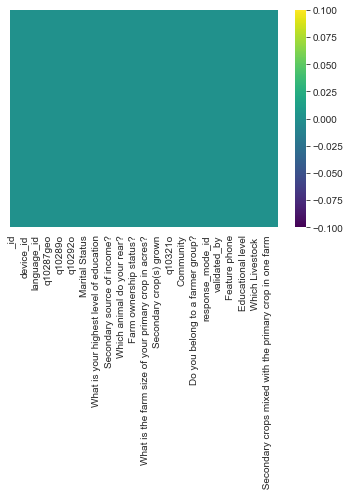

In [23]:
# No null values!
sns.heatmap(farmer_data.isnull(),cbar = True, yticklabels = False, cmap = 'viridis')

GRAPHS

<AxesSubplot:xlabel='completion_rate', ylabel='Count'>

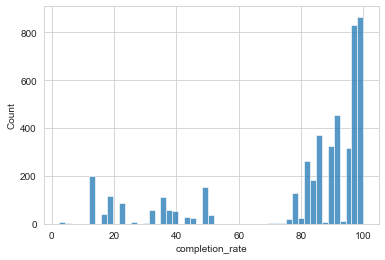

In [24]:
#Checking the level of compltion  of questionnaires by respondents(Farmers) 
sns.histplot( x = 'completion_rate' , data = farmer_data )


<AxesSubplot:xlabel='is_validated', ylabel='count'>

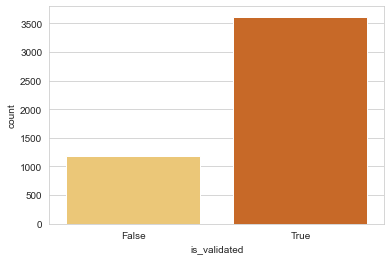

In [25]:
#Checking if data collected 11by enumerators were validated  the data given is
# The graph indicates over 3500 of the data provided has been validated
sns.countplot(x = 'is_validated' , data = farmer_data ,palette='YlOrBr')



<AxesSubplot:xlabel='I consent to my personal data being recorded and processed for purposes to aid farmer insight and decision making', ylabel='count'>

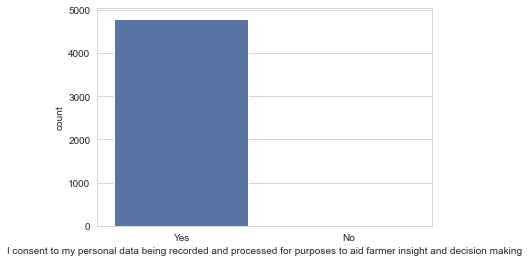

In [26]:
# All   farmers gave their consent for data collection 
sns.countplot( x= 'I consent to my personal data being recorded and processed for purposes to aid farmer insight and decision making', data = farmer_data , palette='deep')


<AxesSubplot:xlabel='is_flagged', ylabel='count'>

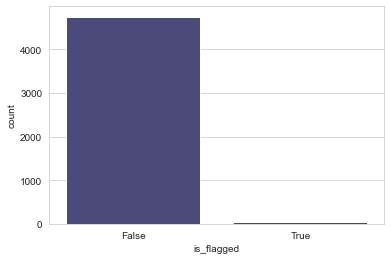

In [27]:
#Indicates the maximum of data entered is not flagged
sns.countplot(x = 'is_flagged' , data = farmer_data,palette='icefire' )


<AxesSubplot:xlabel='Gender', ylabel='count'>

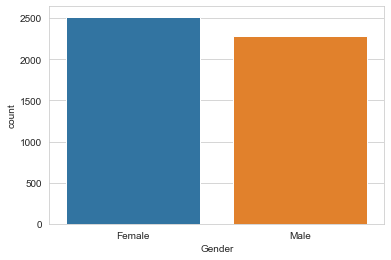

In [28]:
# Distribution of Female and Male farmers.
#Female farmers are more than male farmers
sns.countplot(x = 'Gender' , data = farmer_data) 

<AxesSubplot:xlabel='Age', ylabel='Count'>

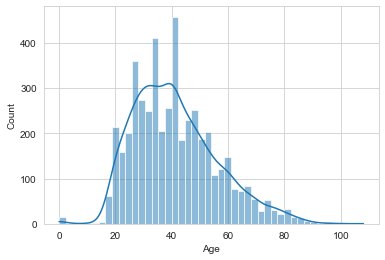

In [29]:
sns.histplot(x = 'Age', kde = True ,data = farmer_data )

<AxesSubplot:xlabel='Age', ylabel='Count'>

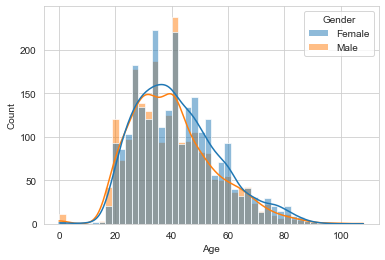

In [30]:
sns.histplot(x = 'Age', hue = 'Gender' , kde = True ,data = farmer_data )

No handles with labels found to put in legend.


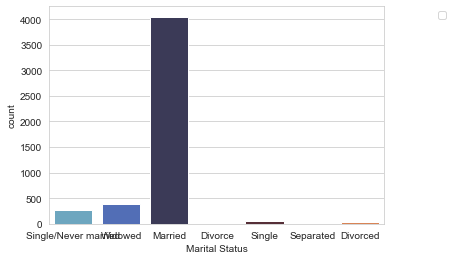

In [31]:
# over 2000 female farmers are married, a little to 2000 males are married , thera are more sinle male farmers than female farmers , 
sns.countplot(x ='Marital Status'  , data = farmer_data, palette = 'icefire').legend(bbox_to_anchor= (1.2,1))

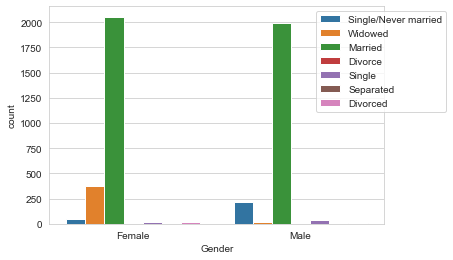

In [32]:
# over 2000 female farmers are married, a little to 2000 males are married , thera are more sinle male farmers than female farmers , 
sns.countplot(x ='Gender' ,hue='Marital Status'  , data = farmer_data ).legend(bbox_to_anchor= (1.2,1))

<AxesSubplot:xlabel='Indicate Number of children', ylabel='Count'>

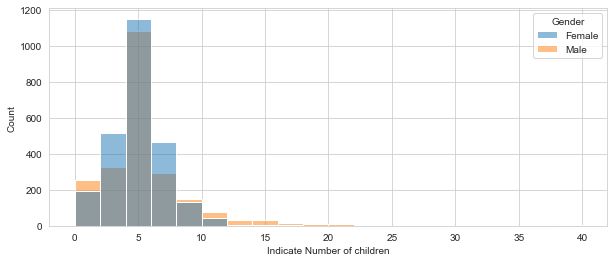

In [33]:
plt.figure(figsize = (10,4))
sns.histplot( farmer_data, x= 'Indicate Number of children' ,hue = 'Gender'  ,bins = 20 )

<Figure size 1080x288 with 0 Axes>

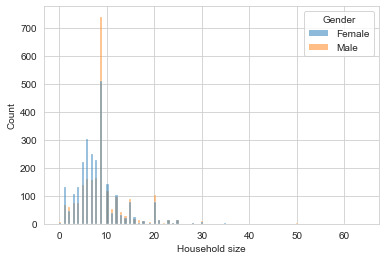

<Figure size 1080x288 with 0 Axes>

In [34]:

sns.histplot(farmer_data, x= 'Household size' ,hue = 'Gender')
plt.figure(figsize=(15,4))


<AxesSubplot:xlabel='What is your highest level of education', ylabel='count'>

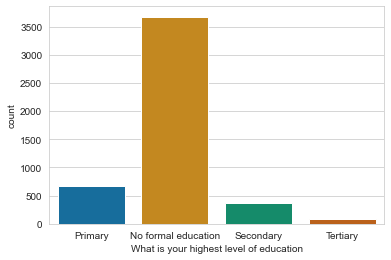

In [35]:
sns.countplot( x= 'What is your highest level of education', data = farmer_data ,palette= 'colorblind')

<AxesSubplot:xlabel='What is your highest level of education', ylabel='count'>

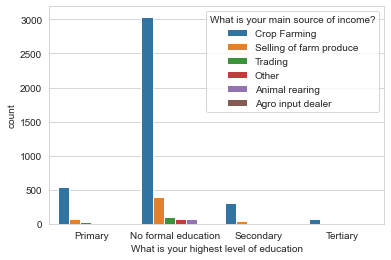

In [36]:
sns.countplot( x= 'What is your highest level of education',hue = 'What is your main source of income?', data = farmer_data )

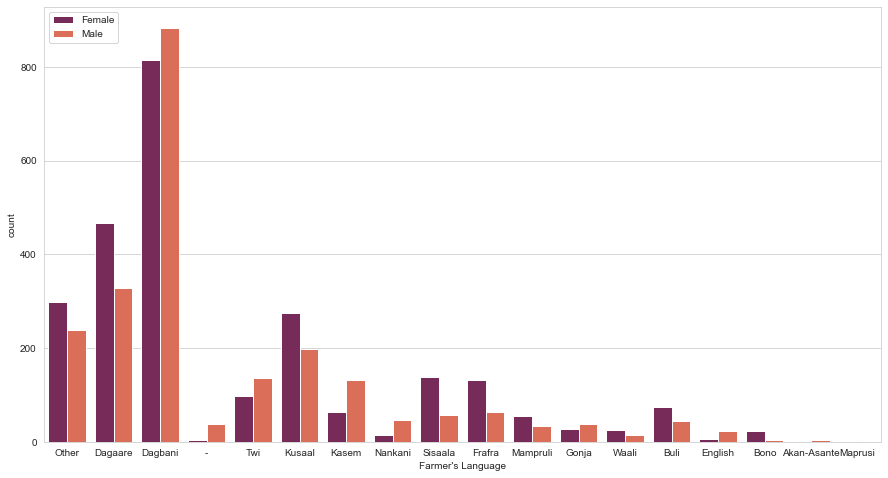

In [37]:
plt.figure( figsize = (15,8))

sns.countplot(x= "Farmer's Language"  , hue = 'Gender',data = farmer_data , palette='rocket')
plt.legend()


<AxesSubplot:xlabel='Years of farming experience?', ylabel='Count'>

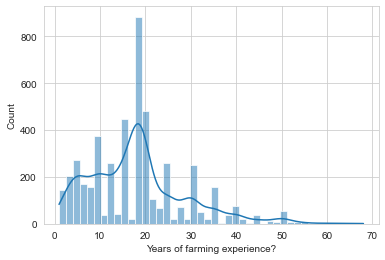

In [38]:
sns.histplot(x='Years of farming experience?'  ,kde = True, data =farmer_data)

<AxesSubplot:xlabel='Age', ylabel='Years of farming experience?'>

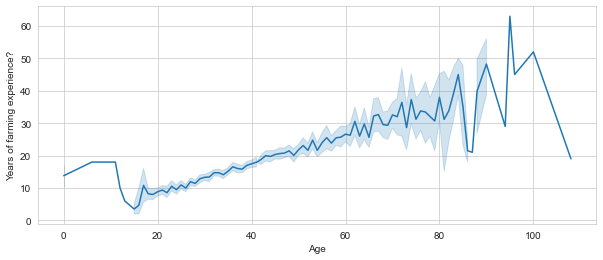

In [39]:
plt.figure(figsize = (10,4))
sns.lineplot(x='Age',y = 'Years of farming experience?',data = farmer_data)

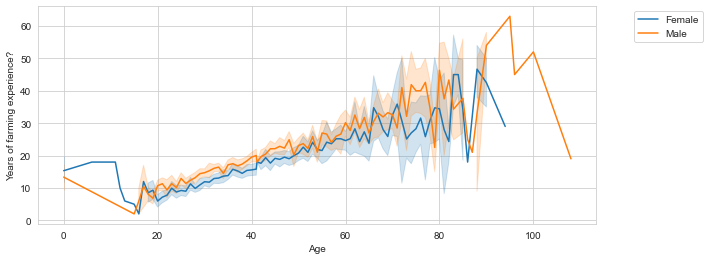

In [40]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Age' , y= 'Years of farming experience?' , hue='Gender',data = farmer_data).legend(bbox_to_anchor= (1.2,1))

<AxesSubplot:xlabel='Years of farming experience?', ylabel='What is your annual primary crop  yield estimate (bags)?'>

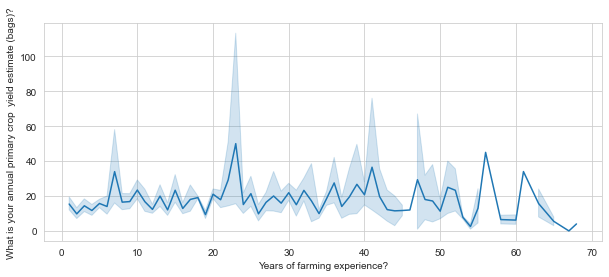

In [41]:
# Graph of years of experience and annual crop yield estimate(bag)
plt.figure(figsize = (10,4))
sns.lineplot(x= 'Years of farming experience?',y= 'What is your annual primary crop  yield estimate (bags)?',data = farmer_data, palette = 'viridis')


<AxesSubplot:xlabel='Years of farming experience?', ylabel='Primary crop grown (Highest income-generating crop)'>

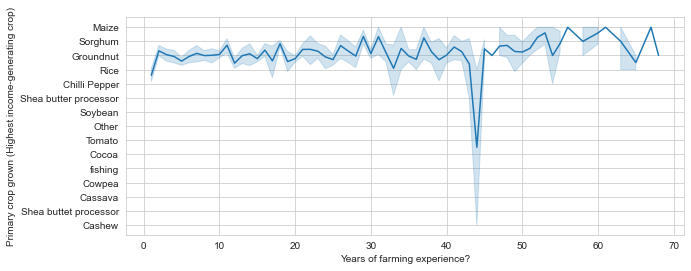

In [42]:
plt.figure(figsize = (10,4))
sns.lineplot(x = 'Years of farming experience?',y= 'Primary crop grown (Highest income-generating crop)',data = farmer_data)

<AxesSubplot:xlabel='Age', ylabel='What is your annual primary crop  yield estimate (bags)?'>

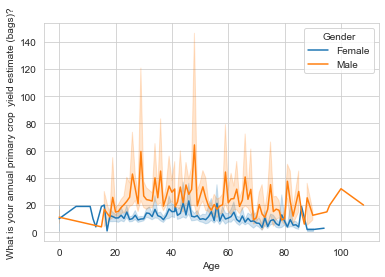

In [43]:
sns.lineplot(x = 'Age' ,y= 'What is your annual primary crop  yield estimate (bags)?',hue='Gender' ,data = farmer_data )

<AxesSubplot:xlabel='What is your main source of income?', ylabel='count'>

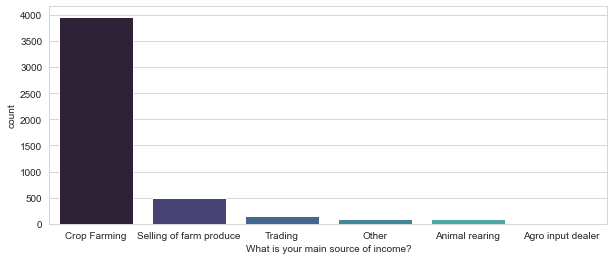

In [44]:
plt.figure(figsize = (10,4))
sns.countplot(x='What is your main source of income?' , data =farmer_data ,palette = 'mako')

<AxesSubplot:xlabel='What is your main source of income?', ylabel='count'>

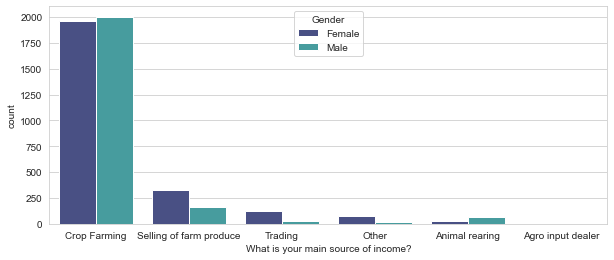

In [45]:
plt.figure(figsize = (10,4))
sns.countplot(x='What is your main source of income?' ,hue = 'Gender', data =farmer_data ,palette = 'mako')

<AxesSubplot:xlabel='Secondary source of income?', ylabel='count'>

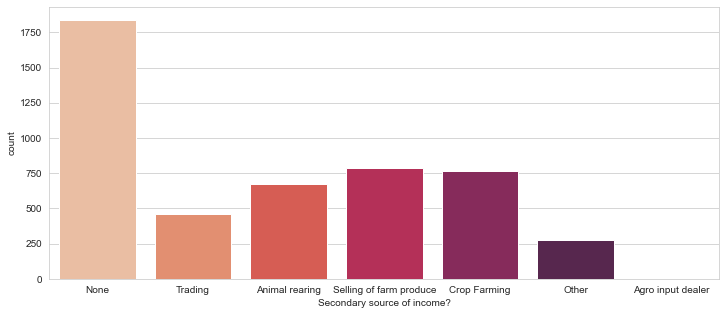

In [46]:
plt.figure(figsize = (12,5))

sns.countplot(x='Secondary source of income?' , data =farmer_data , palette='rocket_r')

<AxesSubplot:xlabel='Secondary source of income?', ylabel='count'>

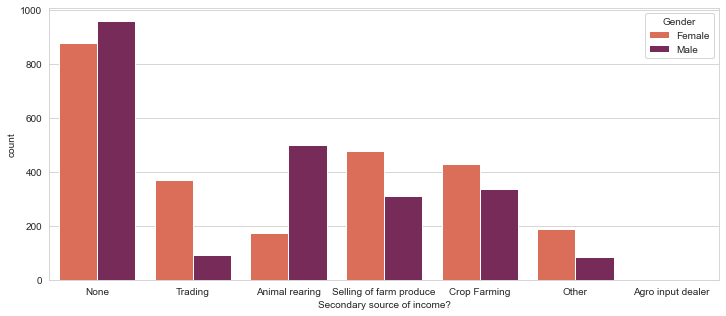

In [47]:
plt.figure(figsize = (12,5))

sns.countplot(x='Secondary source of income?',hue = 'Gender' , data =farmer_data , palette='rocket_r')

<AxesSubplot:xlabel='Age', ylabel='What is your annual primary crop  yield estimate (bags)?'>

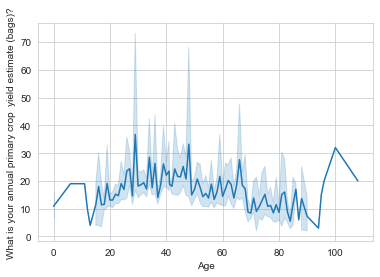

In [48]:
sns.lineplot(x = 'Age' ,y= 'What is your annual primary crop  yield estimate (bags)?' ,data = farmer_data )

<AxesSubplot:xlabel='Primary crop grown (Highest income-generating crop)', ylabel='count'>

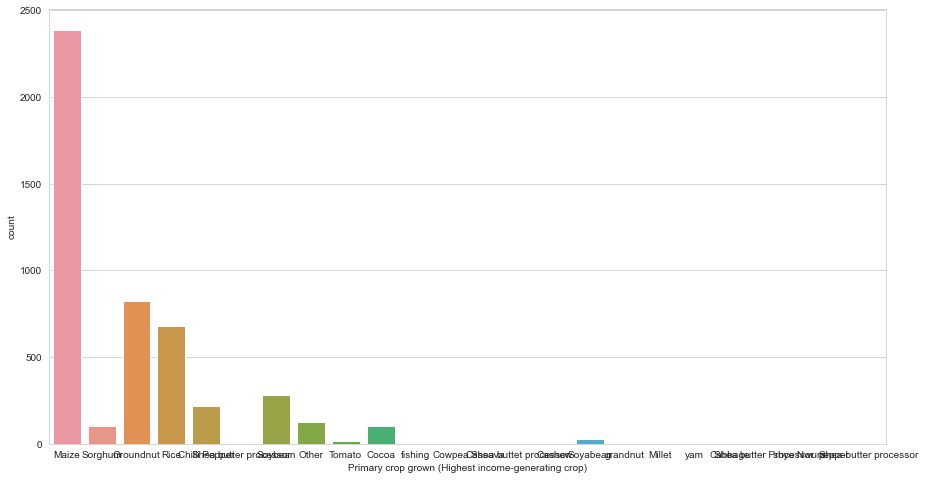

In [49]:
plt.figure(figsize = (15,8))
sns.countplot( x= 'Primary crop grown (Highest income-generating crop)' ,data = farmer_data)

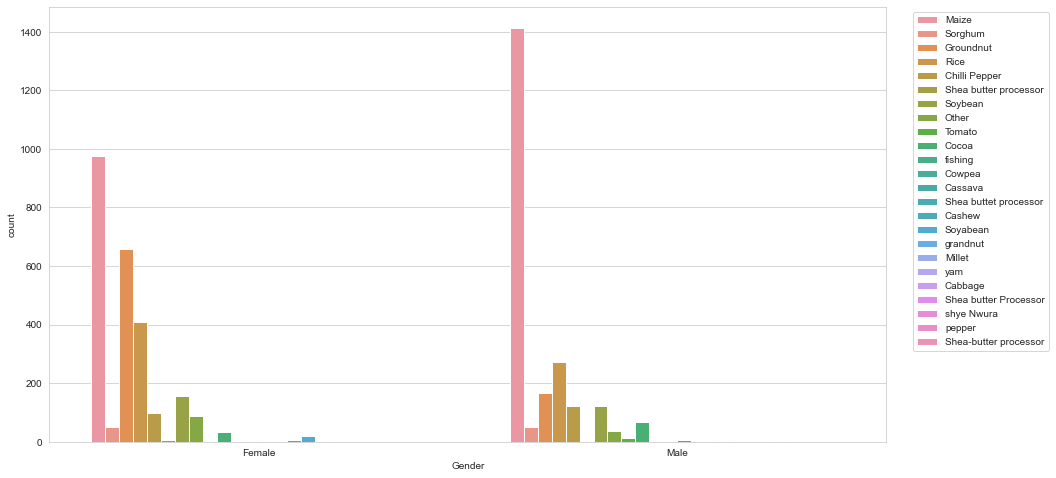

In [50]:
plt.figure(figsize = (15,8))
sns.countplot( hue= 'Primary crop grown (Highest income-generating crop)',x = 'Gender',data = farmer_data).legend(bbox_to_anchor= (1.2,1))

<AxesSubplot:xlabel='Do you keep livestock?', ylabel='count'>

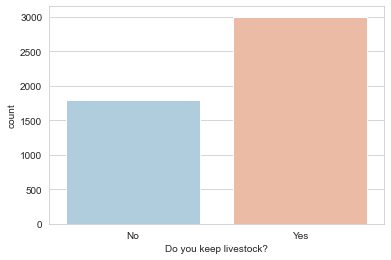

In [51]:
sns.countplot(x='Do you keep livestock?' , data =farmer_data, palette = 'RdBu_r')

<AxesSubplot:xlabel='Do you keep livestock?', ylabel='count'>

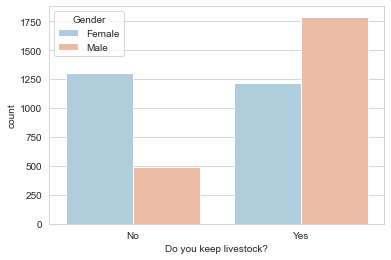

In [52]:
sns.countplot(x='Do you keep livestock?' ,hue='Gender', data =farmer_data, palette = 'RdBu_r')

<AxesSubplot:xlabel='Secondary source of income?', ylabel='Do you keep livestock?'>

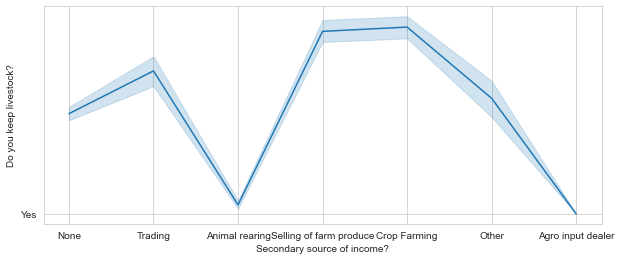

In [53]:
1#Graph of secondary source of income and Keeping livestock
plt.figure(figsize = (10,4))
sns.lineplot(y= 'Do you keep livestock?',x= 'Secondary source of income?',data = farmer_data)


<AxesSubplot:xlabel='Years of farming experience?', ylabel='Count'>

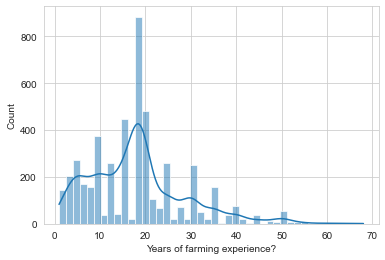

In [54]:
sns.histplot(x='Years of farming experience?'  ,kde = True, data =farmer_data)

<AxesSubplot:xlabel='Farm ownership status?', ylabel='Years of farming experience?'>

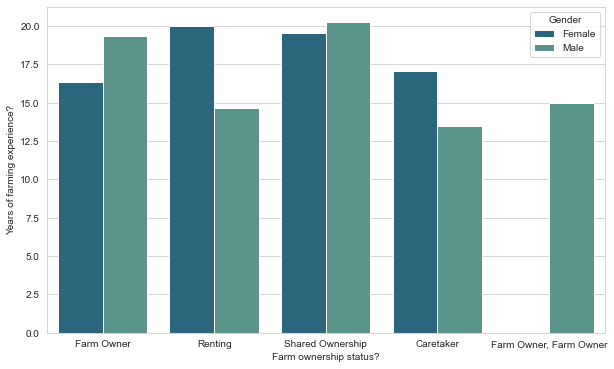

In [55]:
plt.figure(figsize = (10,6))
sns.barplot(x='Farm ownership status?',y = 'Years of farming experience?' ,hue = 'Gender', ci = False, data =farmer_data ,palette = 'crest_r')

<AxesSubplot:xlabel='Primary crop grown (Highest income-generating crop)', ylabel='What is the farm size of your primary crop in acres?'>

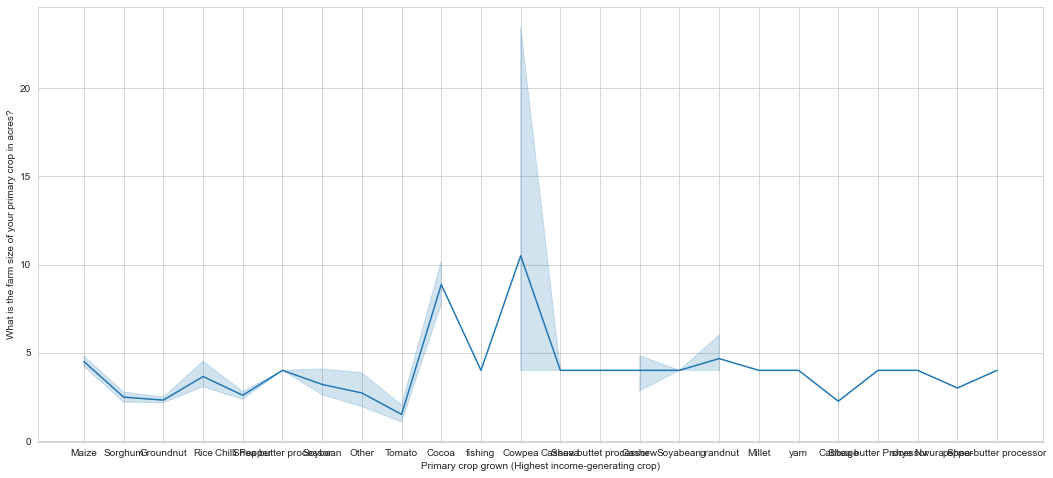

In [56]:
plt.figure(figsize=(18,8))
sns.lineplot( data = farmer_data ,y= 'What is the farm size of your primary crop in acres?' ,x='Primary crop grown (Highest income-generating crop)' )

<AxesSubplot:xlabel='Primary crop grown (Highest income-generating crop)', ylabel='What is the farm size of your primary crop in acres?'>

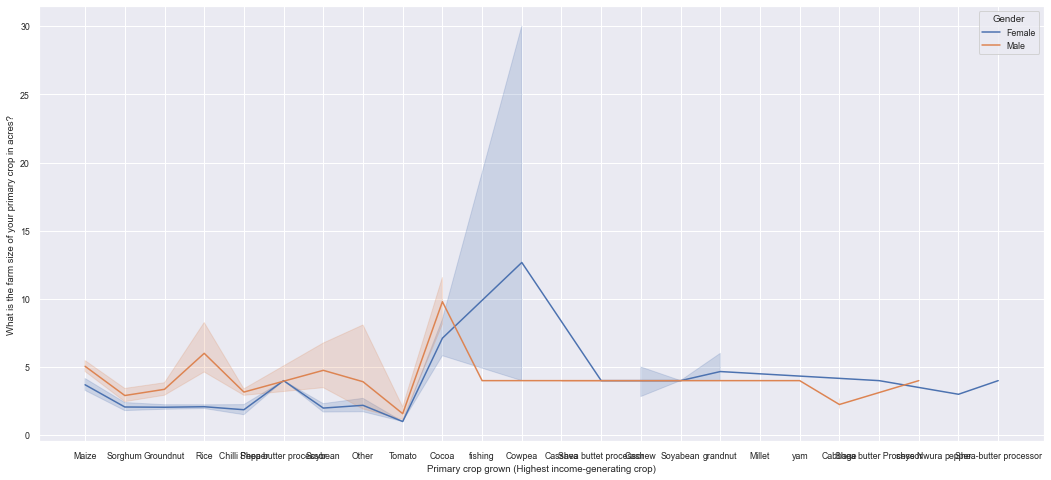

In [57]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 0.8)
sns.lineplot( data = farmer_data ,y= 'What is the farm size of your primary crop in acres?' ,x='Primary crop grown (Highest income-generating crop)' ,hue= 'Gender' )

<AxesSubplot:xlabel='What is your annual primary crop  yield estimate (bags)?', ylabel='Count'>

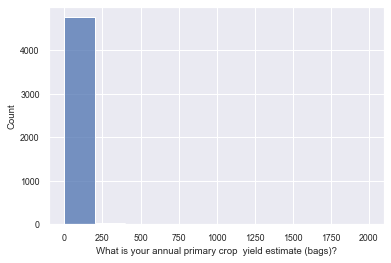

In [58]:
sns.histplot(x='What is your annual primary crop  yield estimate (bags)?' , data =farmer_data, bins = 10)

In [59]:
#Count number of each categorical value in a specified column
#Maize is the highest secondary crop grown, followed by Groundnut and RIce,Soyabean,Chilli Pepper among others
farmer_data['Secondary crop(s) grown'].value_counts()



Maize                                                                         1945
Groundnut                                                                      229
Rice                                                                           207
Soybean                                                                        121
Chilli Pepper                                                                  101
                                                                              ... 
Tomato, Vegetables, Chilli Pepper                                                1
Millet, Tomato, Onion, Vegetables                                                1
Beans, Maize, Millet, Tomato, Vegetables                                         1
Soybean, Rice, Maize, Millet, Beans, Onion, Vegetables, Cabbage, Groundnut       1
Beans, Cassava, Yam                                                              1
Name: Secondary crop(s) grown, Length: 674, dtype: int64

In [72]:
#Number of Farmers in the various Farmer Group/ Association/ Agribusiness
farmer_data['Name of Farmer Group/ Association/ Agribusiness'].value_counts()

Gubkatimali          2128
ms bonsu               37
gubkatimal             31
Kpammaga farmers       30
Suglo n bori buni      30
                     ... 
KANWURO VSLA            1
Nulanfo                 1
gub katimal             1
nigeen                  1
Mansumsim               1
Name: Name of Farmer Group/ Association/ Agribusiness, Length: 892, dtype: int64

<AxesSubplot:xlabel='Do you grow a secondary crop?', ylabel='count'>

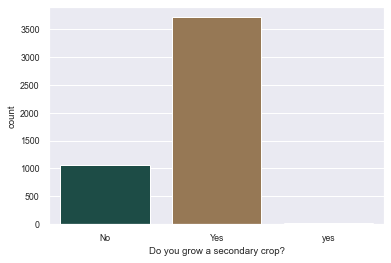

In [60]:
sns.countplot(x='Do you grow a secondary crop?' , data =farmer_data, palette='cubehelix')



<AxesSubplot:xlabel='Do you grow a secondary crop?', ylabel='count'>

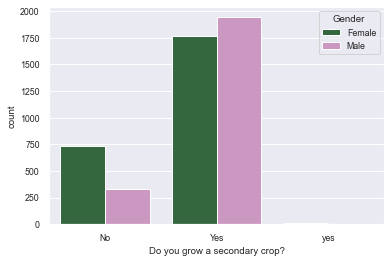

In [61]:
sns.countplot(x='Do you grow a secondary crop?' ,hue = 'Gender', data =farmer_data, palette='cubehelix')


<AxesSubplot:>

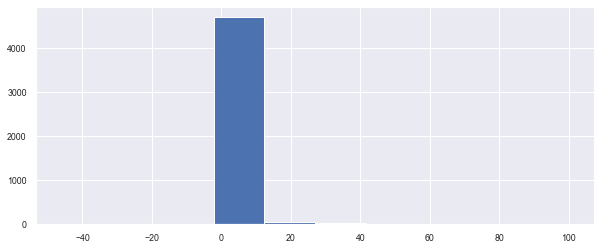

In [62]:
farmer_data['What is the farm size of your secondary crop in acres?'].hist(bins = 10, figsize =(10,4))

<AxesSubplot:xlabel='Are your secondary crops mixed with the primary crop in one farm?', ylabel='count'>

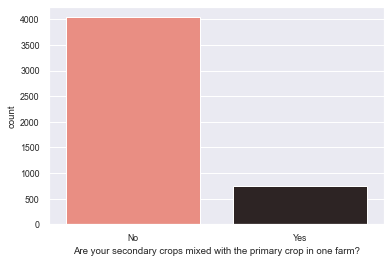

In [63]:
sns.countplot(x='Are your secondary crops mixed with the primary crop in one farm?' , data =farmer_data , palette = 'dark:salmon_r')

<AxesSubplot:xlabel='What is the farm size of your primary crop in acres?', ylabel='What is the farm size of your secondary crop in acres?'>

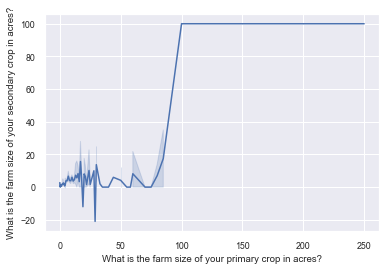

In [64]:
sns.lineplot( x = 'What is the farm size of your primary crop in acres?', y='What is the farm size of your secondary crop in acres?', data = farmer_data)

<AxesSubplot:xlabel='Do you belong to a farmer group?', ylabel='count'>

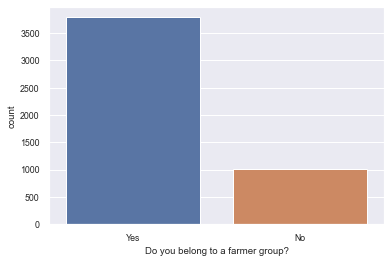

In [65]:
sns.countplot(x='Do you belong to a farmer group?' , data =farmer_data)

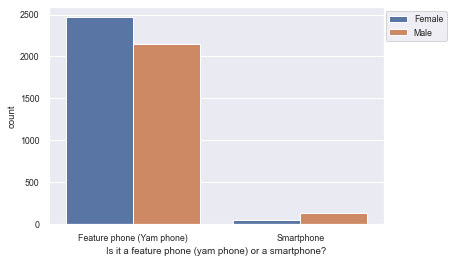

In [69]:
sns.countplot( x='Is it a feature phone (yam phone) or a smartphone?',hue = 'Gender',data = farmer_data).legend(bbox_to_anchor= (1.2,1))

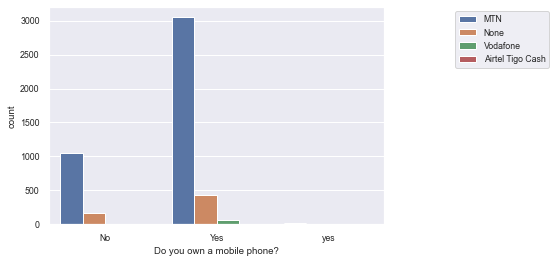

In [66]:
sns.countplot(x='Do you own a mobile phone?' ,hue = 'Which mobile network have you primarily registered for Mobile Money?', data =farmer_data).legend(bbox_to_anchor= (1.2,1))

<AxesSubplot:xlabel='Which mobile network have you primarily registered for Mobile Money?', ylabel='count'>

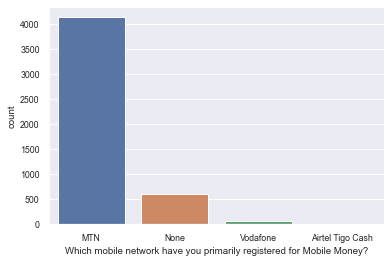

In [67]:
sns.countplot(x='Which mobile network have you primarily registered for Mobile Money?' , data =farmer_data)